## Build a basic chatbot with 'LangGraph' using 'Graph API'

Components of LangGraph
- Edge = arow in graph
- Nodes = box in graph
- State = variable that can be access by any Node

"State Graph"

input ---> NODE("ChatBot") ---> output

NODE("ChatBot) => LLM + Prompt

In [43]:
from typing import Annotated

from typing_extensions import TypedDict             # dict type

from langgraph.graph import (
    StateGraph,                                     # whole graph
    START,                                          # start node
    END                                             # end node
)

from langgraph.graph.message import add_messages    # reducers

state_varaiable = {
    messages = [list of all the messages any new message will be appended here]
}

to append the message in messages list we can use "Reducers". 'add_messages' is one of the reducers.

mesages have type list.
the add_messages annotation defines how the 'State' should be updated.
in this case (when we are using add_messages), it appends the message to the list rather than overwriting them

In [44]:
class State(TypedDict):
    messages: Annotated[list, add_messages]
    
graph_builder = StateGraph(State)

In [45]:
graph_builder

In [46]:
import os
from dotenv import load_dotenv
load_dotenv()

True

### LLM

In [47]:
# defining LLM

from langchain_groq import ChatGroq
from langchain.chat_models import init_chat_model

llm = ChatGroq(model = "llama3-8b-8192")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7b5f914f27e0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7b5f914f3320>, model_name='llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [48]:
llm = init_chat_model("groq:llama3-8b-8192")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7b5f91618740>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7b5f916cda60>, model_name='llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********'))

### Node

In [49]:
def chatbot(state: State):
    return {
        "messages": [llm.invoke(state['messages'])]
    }

### Building Graph

we have
- 1 input
- 1 output
- 1 Node
- 2 Edge
- 1 State

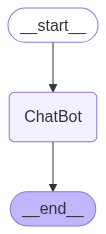

In [50]:
graph_builder = StateGraph(State)

# adding node
graph_builder.add_node("ChatBot", chatbot)

# adding Edge
graph_builder.add_edge(START, "ChatBot")
graph_builder.add_edge("ChatBot", END)

# Compile the Graph
graph = graph_builder.compile()
graph

### Visualize the Graph

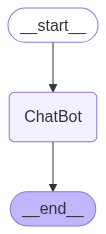

In [51]:
from IPython.display import Image, display

try:
    display(
        Image(
            graph.get_graph().draw_mermaid_png()
        )
    )
except Exception:
    pass

## Running this Graph

In [52]:
response = graph.invoke({"messages": "Hi, how are you? Tell me your model name."})

In [53]:
response

{'messages': [HumanMessage(content='Hi, how are you? Tell me your model name.', additional_kwargs={}, response_metadata={}, id='5b31ed52-5773-4f76-97c8-9a7e1fe8c5ad'),
  AIMessage(content="Hi! I'm happy to chat with you. I'm LLaMA, an AI assistant developed by Meta AI that can understand and respond to human input in a conversational manner. I'm not a human, but a computer program designed to simulate conversation and answer questions to the best of my knowledge. I don't have feelings or emotions like humans do, but I'm designed to be friendly and helpful!", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 83, 'prompt_tokens': 22, 'total_tokens': 105, 'completion_time': 0.083156937, 'prompt_time': 0.003434576, 'queue_time': 0.288004363, 'total_time': 0.086591513}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8dc6ecaf8e', 'finish_reason': 'stop', 'logprobs': None}, id='run--c08d9e2e-ecd0-46f7-8e91-73233ba82883-0', usage_metadata={'input_tokens':

In [54]:
response["messages"]

[HumanMessage(content='Hi, how are you? Tell me your model name.', additional_kwargs={}, response_metadata={}, id='5b31ed52-5773-4f76-97c8-9a7e1fe8c5ad'),
 AIMessage(content="Hi! I'm happy to chat with you. I'm LLaMA, an AI assistant developed by Meta AI that can understand and respond to human input in a conversational manner. I'm not a human, but a computer program designed to simulate conversation and answer questions to the best of my knowledge. I don't have feelings or emotions like humans do, but I'm designed to be friendly and helpful!", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 83, 'prompt_tokens': 22, 'total_tokens': 105, 'completion_time': 0.083156937, 'prompt_time': 0.003434576, 'queue_time': 0.288004363, 'total_time': 0.086591513}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8dc6ecaf8e', 'finish_reason': 'stop', 'logprobs': None}, id='run--c08d9e2e-ecd0-46f7-8e91-73233ba82883-0', usage_metadata={'input_tokens': 22, 'output_t

In [55]:
graph.invoke({"messages": "what is todays date?"})

{'messages': [HumanMessage(content='what is todays date?', additional_kwargs={}, response_metadata={}, id='d40ee1ab-4d24-4f15-bab4-3b35e4171588'),
  AIMessage(content="I'm just an AI, I don't have have access to real-time information, including the current date. However, I can tell you the current date in a simulated conversation.", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 37, 'prompt_tokens': 16, 'total_tokens': 53, 'completion_time': 0.05057985, 'prompt_time': 0.005455477, 'queue_time': 0.288265104, 'total_time': 0.056035327}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8b7c3a83f7', 'finish_reason': 'stop', 'logprobs': None}, id='run--571d73e1-dd84-491f-bfe7-a002139a7a46-0', usage_metadata={'input_tokens': 16, 'output_tokens': 37, 'total_tokens': 53})]}

In [56]:
response["messages"][-1].content

"Hi! I'm happy to chat with you. I'm LLaMA, an AI assistant developed by Meta AI that can understand and respond to human input in a conversational manner. I'm not a human, but a computer program designed to simulate conversation and answer questions to the best of my knowledge. I don't have feelings or emotions like humans do, but I'm designed to be friendly and helpful!"

Streaming the specific data.

running the entire graph and displaying the information

In [57]:
for event in graph.stream({'messages': 'Hi, how are you, what is your model name?'}):
    print(event)

{'ChatBot': {'messages': [AIMessage(content='Nice to meet you! I\'m an AI, so I don\'t have a personal name, but I\'m often referred to as a "language model" or a "chatbot." I\'m a type of artificial intelligence designed to understand and respond to human language, so I can have conversations with users like you! I\'m constantly learning and improving my abilities, so I\'m excited to chat with you and see how I can help. What\'s on your mind?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 94, 'prompt_tokens': 22, 'total_tokens': 116, 'completion_time': 0.138438199, 'prompt_time': 0.006063214, 'queue_time': 0.284889608, 'total_time': 0.144501413}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8b7c3a83f7', 'finish_reason': 'stop', 'logprobs': None}, id='run--977e16c9-49bb-4cd9-be9c-68bfad09262c-0', usage_metadata={'input_tokens': 22, 'output_tokens': 94, 'total_tokens': 116})]}}


In [58]:
for event in graph.stream({'messages': 'Hi, how are you, what is your model name?'}):
    for value in event.values():
        print(value)
        print(value['messages'][-1].content)

{'messages': [AIMessage(content='I\'m just an AI, I don\'t have a personal name or a physical body, so I don\'t have a "model name" in the classical sense. I\'m just a computer program designed to understand and generate human-like text. I\'m here to help answer your questions and provide information on a wide range of topics, so feel free to ask me anything!', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 75, 'prompt_tokens': 22, 'total_tokens': 97, 'completion_time': 0.075410544, 'prompt_time': 0.003734322, 'queue_time': 0.280884988, 'total_time': 0.079144866}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8dc6ecaf8e', 'finish_reason': 'stop', 'logprobs': None}, id='run--6081d78e-520c-44bf-b6d4-41d80e0c386f-0', usage_metadata={'input_tokens': 22, 'output_tokens': 75, 'total_tokens': 97})]}
I'm just an AI, I don't have a personal name or a physical body, so I don't have a "model name" in the classical sense. I'm just a computer program desig

In [59]:
graph.invoke({"messages": "Provide me the recent AI news with date"})

{'messages': [HumanMessage(content='Provide me the recent AI news with date', additional_kwargs={}, response_metadata={}, id='dc021cc6-10b8-4617-ae9b-290a6ac56e7a'),
  AIMessage(content='Here are some recent AI news updates with dates:\n\n**March 2023**\n\n1. **Google announces AI-powered breast cancer detection tool** (March 15, 2023): Google has developed an AI-powered tool that can detect breast cancer from mammography images with high accuracy, according to a study published in the journal Nature Medicine. [Source: The Verge]\n2. **Microsoft announces AI-powered chatbot for customer service** (March 14, 2023): Microsoft has launched an AI-powered chatbot called "Pittsburgh" that can help businesses provide customer service to their clients. [Source: CNET]\n\n**February 2023**\n\n1. **OpenAI releases AI-powered text-to-image generation model** (February 22, 2023): OpenAI has released a new AI model called "DALL-E 2" that can generate realistic images from text prompts. [Source: The 

# ChatBot with Tool

In [60]:
diagram = '''
                                 ---> NODE(tools) --->
                                /                     \
input ---> NODE(ToolCallingLLM) --------------------> output

Tools => Tavily Search (web search) + Custom Tool

'''

In [61]:
from langchain_tavily import TavilySearch

tool = TavilySearch(max_results = 2)
tool.invoke("What is langGraph?")

{'query': 'What is langGraph?',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'title': 'What is LangGraph? - IBM',
   'url': 'https://www.ibm.com/think/topics/langgraph',
   'content': 'LangGraph, created by LangChain, is an open source AI agent framework designed to build, deploy and manage complex generative AI agent workflows. At its core, LangGraph uses the power of graph-based architectures to model and manage the intricate relationships between various components of an AI agent workflow. LangGraph illuminates the processes within an AI workflow, allowing full transparency of the agent’s state. By combining these technologies with a set of APIs and tools, LangGraph provides users with a versatile platform for developing AI solutions and workflows including chatbots, state graphs and other agent-based systems. Nodes: In LangGraph, nodes represent individual components or agents within an AI workflow. LangGraph uses enhanced decision-making by modeling 

In [62]:
# creating custom function

def multiply(a: int, b: int) -> int:
    """Multiply a and b

    Args:
        a (int): first int
        b (int): second int

    Returns:
        int: output int
    """
    # this is called doc string
    return a*b

In [63]:
# creating tools
tools = [tool, multiply]
tools

[TavilySearch(max_results=2, api_wrapper=TavilySearchAPIWrapper(tavily_api_key=SecretStr('**********'))),
 <function __main__.multiply(a: int, b: int) -> int>]

In [64]:
# binding tools with llm
llm_with_tools = llm.bind_tools(tools = tools)
llm_with_tools

RunnableBinding(bound=ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7b5f91618740>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7b5f916cda60>, model_name='llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********')), kwargs={'tools': [{'type': 'function', 'function': {'name': 'tavily_search', 'description': 'A search engine optimized for comprehensive, accurate, and trusted results. Useful for when you need to answer questions about current events. It not only retrieves URLs and snippets, but offers advanced search depths, domain management, time range filters, and image search, this tool delivers real-time, accurate, and citation-backed results.Input should be a search query.', 'parameters': {'properties': {'query': {'description': 'Search query to look up', 'type': 'string'}, 'include_domains': {'anyOf': [{'items': {'type': 'string'}, 'type': 'array'}, {'type': 'null'}], 'default': [], 'description': 'A list of domai

Binding ==> LLM + Tools    
[helps LLM to know which ara all the tools it has]

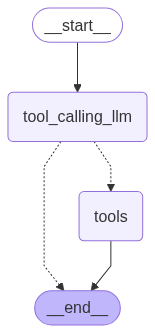

In [65]:
# State Graph
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

# Node definition
def tool_calling_llm(state: State):
    return {
        'messages': [llm_with_tools.invoke(state['messages'])]
    }

# building graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_node("tools", ToolNode(tools = tools))

# adding edges
builder.add_edge(START, "tool_calling_llm")
# from tool_calling_llm there are 2 edges one give output and other call tools - this type of edges are called conditional edges
builder.add_conditional_edges(
    "tool_calling_llm",
    tools_condition
    # What is this tools_condition
    # if the latest message (result) from the assistant is a tool call -- tools_condition routes to tools (tools=[], you have to use teh same name)
    # if the latest message (result) from the assistant is not a tool call -- tools_condition routes to END
)
builder.add_edge("tools", END)

# compile graph
graph = builder.compile()
graph

In [66]:
response = graph.invoke({'messages': 'WHat is the latest AI news?'})
response

{'messages': [HumanMessage(content='WHat is the latest AI news?', additional_kwargs={}, response_metadata={}, id='e78fa5dd-5046-4086-8d99-bf0487b7e47a'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '9st3azk9r', 'function': {'arguments': '{"query":"latest AI news","search_depth":"advanced","topic":"news"}', 'name': 'tavily_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 85, 'prompt_tokens': 2196, 'total_tokens': 2281, 'completion_time': 0.11844079, 'prompt_time': 0.244537038, 'queue_time': 0.28723992099999995, 'total_time': 0.362977828}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8b7c3a83f7', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--71b1d7c8-6648-4735-880b-bf859cff0cab-0', tool_calls=[{'name': 'tavily_search', 'args': {'query': 'latest AI news', 'search_depth': 'advanced', 'topic': 'news'}, 'id': '9st3azk9r', 'type': 'tool_call'}], usage_metadata={'input_tokens': 2196, 'output_tokens': 85, 'to

In [67]:
response['messages'][-1].content

'{"query": "latest AI news", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "http://www.sciencedaily.com/releases/2025/06/250622225921.htm", "title": "Affordances in the brain: The human superpower AI hasn’t mastered - ScienceDaily", "score": 0.7361925, "published_date": "Mon, 23 Jun 2025 08:56:12 GMT", "content": "Date:June 23, 2025 Source:Universiteit van Amsterdam Summary:Scientists at the University of Amsterdam discovered that our brains automatically understand how we can move through different environments—whether it\'s swimming in a lake or walking a path—without conscious thought. These \\"action possibilities,\\" or affordances, light up specific brain regions independently of what’s visually present. In contrast, AI models like ChatGPT still struggle with these intuitive judgments, missing the [...] Universiteit van Amsterdam. \\"Affordances in the brain: The human superpower AI hasn’t mastered.\\" ScienceDaily. ScienceDaily, 23 June 2025. <ww

In [68]:
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

WHat is the latest AI news?
================================== Ai Message ==================================
Tool Calls:
  tavily_search (9st3azk9r)
 Call ID: 9st3azk9r
  Args:
    query: latest AI news
    search_depth: advanced
    topic: news
================================= Tool Message =================================
Name: tavily_search

{"query": "latest AI news", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "http://www.sciencedaily.com/releases/2025/06/250622225921.htm", "title": "Affordances in the brain: The human superpower AI hasn’t mastered - ScienceDaily", "score": 0.7361925, "published_date": "Mon, 23 Jun 2025 08:56:12 GMT", "content": "Date:June 23, 2025 Source:Universiteit van Amsterdam Summary:Scientists at the University of Amsterdam discovered that our brains automatically understand how we can move through different environments—whether it's swimmin

In [69]:
response = graph.invoke({'messages': 'WHat is 9 multiply by 5?'})
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

WHat is 9 multiply by 5?
================================== Ai Message ==================================
Tool Calls:
  multiply (ze0j44jbm)
 Call ID: ze0j44jbm
  Args:
    a: 9
    b: 5
================================= Tool Message =================================
Name: multiply

45


In [70]:
response = graph.invoke({'messages': 'WHat is 9 multiply by 5 then nultiply 2?'})
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

WHat is 9 multiply by 5 then nultiply 2?
================================== Ai Message ==================================
Tool Calls:
  multiply (p0q91xqh9)
 Call ID: p0q91xqh9
  Args:
    a: 9
    b: 5
  multiply (stscpcgx0)
 Call ID: stscpcgx0
  Args:
    a: 45
    b: 2
================================= Tool Message =================================
Name: multiply

45
================================= Tool Message =================================
Name: multiply

90


In [72]:
response = graph.invoke({'messages': 'Give me recent ai new by apple and what is multiply 9 and 7'})
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

Give me recent ai new by apple and what is multiply 9 and 7
================================== Ai Message ==================================
Tool Calls:
  tavily_search (fpyhdb7kk)
 Call ID: fpyhdb7kk
  Args:
    query: Apple AI news
  multiply (kmcb8cyk4)
 Call ID: kmcb8cyk4
  Args:
    a: 9
    b: 7
================================= Tool Message =================================
Name: tavily_search

{"query": "Apple AI news", "follow_up_questions": null, "answer": null, "images": [], "results": [{"title": "Here are Apple's top AI announcements from WWDC 2025", "url": "https://techcrunch.com/2025/06/12/here-are-apples-top-ai-announcements-from-wwdc-2025/", "content": "Here are Apple's top AI announcements from WWDC 2025 | TechCrunch Here are Apple's top AI announcements from WWDC 2025 | TechCrunch Nevertheless, Apple still attempted to appease the crowd with a few AI-related announcements, such as an ima